In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Imported a lot of packages so that I can decide what all I want to use later...

In [2]:
candidate_info_df = pd.read_csv('full_candidate_info.zip')
candidate_info_df.tail(50)

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($)
836,Don Beyer,Democrat,Virginia,8,Yes,Yes,75.8,1729482,2071906
837,Jeff Jordan,Republican,Virginia,8,No,No,24.0,96035,96035
838,Heerak Christian Kim,Independent,Virginia,8,No,No,NaN,2036,1921
839,Morgan Griffith,Republican,Virginia,9,Yes,Yes,94.0,873612,463916
840,Jennifer Wexton,Democrat,Virginia,10,Yes,Yes,56.5,3855331,1772250
841,Aliscia Andrews,Republican,Virginia,10,No,No,43.4,1567598,1413145
842,Gerry Connolly,Democrat,Virginia,11,Yes,Yes,71.4,1998592,1811776
843,Manga Anantatmula,Republican,Virginia,11,No,No,28.3,282152,268326
844,Stevan Porter,Libertarian,Virginia,11,No,No,NaN,533,1316
845,Suzan DelBene,Democrat,Washington,1,Yes,Yes,58.6,2182985,1897162


In [3]:
#Made a dataframe of just the winners
winner_df = candidate_info_df[candidate_info_df['Is_Winner']=='Yes']

#Made a dataframe that indicated the max $ raised in each state/district pair.
max_raised = candidate_info_df.groupby(['State','District'],as_index=False)['Money_Raised_($)'].max()
max_raised = max_raised.rename(columns = {'Money_Raised_($)':'Most_$_Raised_In_District'}).copy()

#Made a dataframe that indicated the max $ spent in each state/district pair.
max_spent = candidate_info_df.groupby(['State','District'],as_index=False)['Money_Spent_($)'].max()
max_spent = max_spent.rename(columns = {'Money_Spent_($)':'Most_$_Spent_In_District'}).copy()

#Merged max raised and max spent dataframes with winner_df.
winner_df = winner_df.merge(max_raised,on=['State','District'],how='inner').copy()
winner_df = winner_df.merge(max_spent,on=['State','District'],how='inner').copy()

winner_df.head()

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($),Most_$_Raised_In_District,Most_$_Spent_In_District
0,Jerry Carl,Republican,Alabama,1,No,Yes,64.9,1971321,1859349,1971321,1859349
1,Barry Moore,Republican,Alabama,2,No,Yes,65.3,650807,669368,650807,669368
2,Mike D Rogers,Republican,Alabama,3,Yes,Yes,67.5,1193111,1218564,1193111,1218564
3,Robert B Aderholt,Republican,Alabama,4,Yes,Yes,82.5,1255076,1323812,1255076,1323812
4,Mo Brooks,Republican,Alabama,5,Yes,Yes,95.8,655365,210045,655365,210045


In [4]:
#Compares two columns to see if they are equal. Returns Yes/No.
def compare_cols(cols):
    '''Compares two columns to see if they are equal. Returns Yes/No.'''
    if cols[0]==cols[1]:
        return 'Yes'
    else:
        return 'No'

**How often does the candidate who raised more money win a race?**

The percent of winners that raised the most in their district was 88.86%!


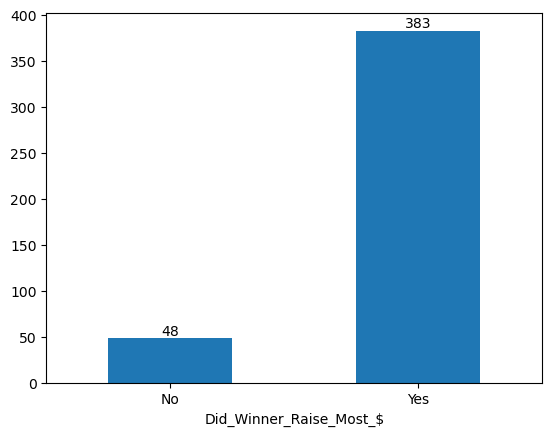

In [5]:
winner_df['Did_Winner_Raise_Most_$'] = winner_df[['Money_Raised_($)','Most_$_Raised_In_District']].apply(compare_cols,axis=1)

raisey_winners = winner_df.groupby(['Did_Winner_Raise_Most_$']).count()['Most_$_Raised_In_District']
pct_raisey_winners = raisey_winners['Yes']/raisey_winners.sum()*100
print(f'The percent of winners that raised the most in their district was {pct_raisey_winners:.2f}%!')

raisey_winner_bar = raisey_winners.plot.bar(rot=0)
raisey_winner_bar.bar_label(raisey_winner_bar.containers[0]);

**How often does the candidate who spent more money win a race?**

The percent of winners that spent the most in their district was 88.17%!


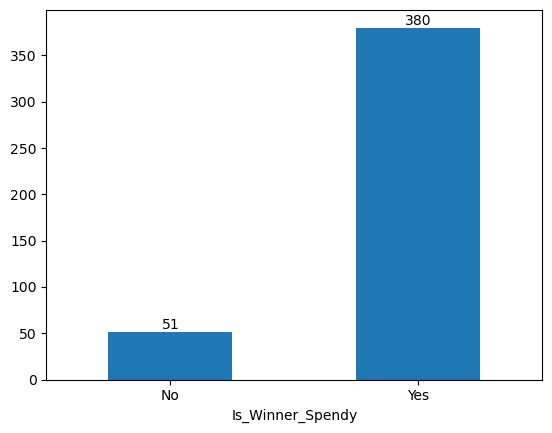

In [6]:
winner_df['Is_Winner_Spendy'] = winner_df[['Money_Spent_($)','Most_$_Spent_In_District']].apply(compare_cols,axis=1)

spendy_winners = winner_df.groupby(['Is_Winner_Spendy']).count()['Most_$_Spent_In_District']
pct_spendy_winners = spendy_winners['Yes']/spendy_winners.sum()*100
print(f'The percent of winners that spent the most in their district was {pct_spendy_winners:.2f}%!')

spendy_winner_bar = spendy_winners.plot.bar(rot=0)
spendy_winner_bar.bar_label(spendy_winner_bar.containers[0]);

**How often does the incumbent candidate win a race?**

The percent of winners that were incumbents was 86.31%!


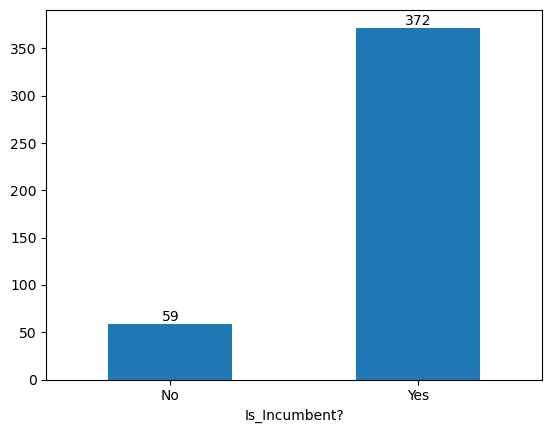

In [7]:
incumbent_winners = winner_df.groupby(['Is_Incumbent?']).count()['Candidate_Name']
pct_incumbent_winners = incumbent_winners['Yes']/incumbent_winners.sum()*100
print(f'The percent of winners that were incumbents was {pct_incumbent_winners:.2f}%!')

incumbent_winner_bar = incumbent_winners.plot.bar(rot=0)
incumbent_winner_bar.bar_label(incumbent_winner_bar.containers[0]);

In [8]:
incumbent_df = candidate_info_df[candidate_info_df['Is_Incumbent?']=='Yes']
incumbent_df = incumbent_df.merge(max_raised,on=['State','District'],how='inner').copy()
incumbent_df = incumbent_df.merge(max_spent,on=['State','District'],how='inner').copy()

**Can you detect any relationship between amount of money raised and the incumbent status of a candidate?**

The percent of incumbents that raised the most in their district was 93.02%!


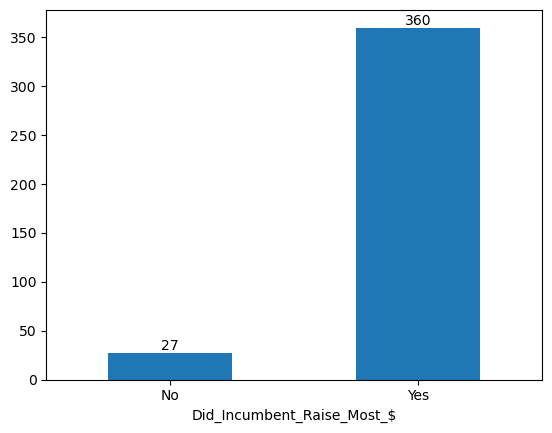

In [9]:
incumbent_df['Did_Incumbent_Raise_Most_$'] = incumbent_df[['Money_Raised_($)','Most_$_Raised_In_District']].apply(compare_cols,axis=1)

raisey_incumbents = incumbent_df.groupby(['Did_Incumbent_Raise_Most_$']).count()['Most_$_Raised_In_District']
pct_raisey_incumbents = raisey_incumbents['Yes']/raisey_incumbents.sum()*100
print(f'The percent of incumbents that raised the most in their district was {pct_raisey_incumbents:.2f}%!')

raisey_incumbents_bar = raisey_incumbents.plot.bar(rot=0)
raisey_incumbents_bar.bar_label(raisey_incumbents_bar.containers[0]);

**Also decided to look at incumbent spending - it seems to match incumbents that raised the most money.**

The percent of incumbents that spent the most in their district was 93.02%!


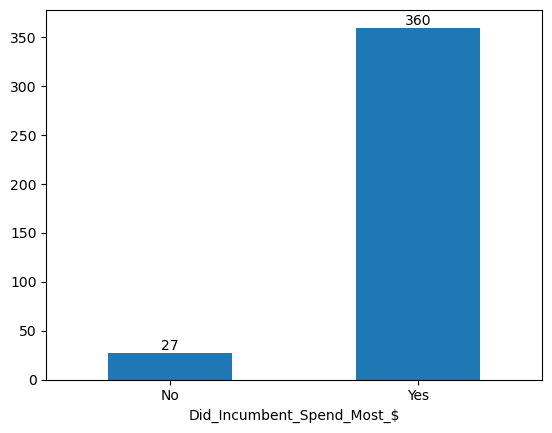

In [10]:
incumbent_df['Did_Incumbent_Spend_Most_$'] = incumbent_df[['Money_Spent_($)','Most_$_Spent_In_District']].apply(compare_cols,axis=1)

spendy_incumbents = incumbent_df.groupby(['Did_Incumbent_Spend_Most_$']).count()['Most_$_Spent_In_District']
pct_spendy_incumbents = spendy_incumbents['Yes']/spendy_incumbents.sum()*100
print(f'The percent of incumbents that spent the most in their district was {pct_spendy_incumbents:.2f}%!')

spendy_incumbents_bar = spendy_incumbents.plot.bar(rot=0)
spendy_incumbents_bar.bar_label(spendy_incumbents_bar.containers[0]);

In [11]:
#Check of random numbers. Concerned that number of winners doesn't equal number of elections.
#Not all winners were shown on site page - calculated a few from vote% - should I hard code the remaining 4?
total_number_of_elections = candidate_info_df.groupby(['State','District']).ngroups
total_number_of_winners = candidate_info_df.groupby(['Is_Winner']).count()
total_number_of_incumbents = candidate_info_df.groupby(['Is_Incumbent?']).count()
#total_number_of_winners
total_number_of_incumbents

,Candidate_Name,Candidate_Party,State,District,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($)
Is_Incumbent?,,,,,,,,
No,499,499,499,499,499,448,499,499
Yes,387,387,387,387,387,379,387,387


In [12]:
#Used to look through specific rows of dataframe if necessary
winner_df.iloc[150:200]

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($),Most_$_Raised_In_District,Most_$_Spent_In_District,Did_Winner_Raise_Most_$,Is_Winner_Spendy
150,Frank Mrvan Jr,Democrat,Indiana,1,No,Yes,56.6,578635,464407,578635,464407,Yes,Yes
151,Jackie Walorski,Republican,Indiana,2,Yes,Yes,61.5,2383467,1698202,2383467,1698202,Yes,Yes
152,Jim Banks,Republican,Indiana,3,Yes,Yes,67.8,1202509,769591,1202509,769591,Yes,Yes
153,Jim Baird,Republican,Indiana,4,Yes,Yes,66.6,327727,190158,327727,190158,Yes,Yes
154,Victoria Spartz,Republican,Indiana,5,No,Yes,50.0,3119328,3010203,4010368,3998905,No,No
155,Greg Pence,Republican,Indiana,6,Yes,Yes,68.7,3114448,2804148,3114448,2804148,Yes,Yes
156,Andre Carson,Democrat,Indiana,7,Yes,Yes,62.4,1011635,873962,1011635,873962,Yes,Yes
157,Larry Bucshon,Republican,Indiana,8,Yes,Yes,66.9,1051336,1078646,1051336,1078646,Yes,Yes
158,Trey Hollingsworth,Republican,Indiana,9,Yes,Yes,60.9,1166754,501136,1166754,501136,Yes,Yes
159,Ashley Hinson,Republican,Iowa,1,No,Yes,51.3,5175883,5059211,5901441,5875405,No,No


**I thought it might be interesting to show the number of winners by party:**

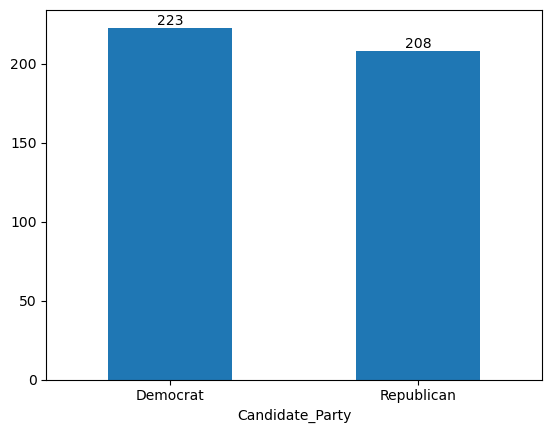

In [13]:
winner_parties = winner_df.groupby(['Candidate_Party']).count()['Candidate_Name']
winner_parties_bar = winner_parties.plot.bar(rot=0)
winner_parties_bar.bar_label(winner_parties_bar.containers[0]);